In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('D:/ML programs/DevIncept/Cab-Fare-Prediction-master/train_cab.csv', na_values={"pickup_datetime":"43"})
test_data=pd.read_csv('D:/ML programs/DevIncept/Cab-Fare-Prediction-master/test.csv')

In [3]:
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
print(train_data.shape)
print(test_data.shape)

(16067, 7)
(9914, 6)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16066 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [6]:
train_data.isnull().sum()

fare_amount          24
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [7]:
train_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


## Operations on null values

In [8]:
train_data['pickup_datetime']=pd.to_datetime(train_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

In [9]:
train_data['year']=train_data['pickup_datetime'].dt.year
train_data['month']=train_data['pickup_datetime'].dt.month
train_data['date']=train_data['pickup_datetime'].dt.day
train_data['day']=train_data['pickup_datetime'].dt.dayofweek
train_data['hour']=train_data['pickup_datetime'].dt.hour
train_data['minute']=train_data['pickup_datetime'].dt.minute

In [10]:
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0


In [11]:
train_data.shape

(16067, 13)

In [12]:
#fare_amount is an object. Convert it into a numeric category
train_data['fare_amount']=pd.to_numeric(train_data['fare_amount'],errors="coerce")

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        16042 non-null  float64       
 1   pickup_datetime    16066 non-null  datetime64[ns]
 2   pickup_longitude   16067 non-null  float64       
 3   pickup_latitude    16067 non-null  float64       
 4   dropoff_longitude  16067 non-null  float64       
 5   dropoff_latitude   16067 non-null  float64       
 6   passenger_count    16012 non-null  float64       
 7   year               16066 non-null  float64       
 8   month              16066 non-null  float64       
 9   date               16066 non-null  float64       
 10  day                16066 non-null  float64       
 11  hour               16066 non-null  float64       
 12  minute             16066 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 1.6 MB


In [14]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

In [15]:
test_data['year']=test_data['pickup_datetime'].dt.year
test_data['month']=test_data['pickup_datetime'].dt.month
test_data['date']=test_data['pickup_datetime'].dt.day
test_data['day']=test_data['pickup_datetime'].dt.dayofweek
test_data['hour']=test_data['pickup_datetime'].dt.hour
test_data['minute']=test_data['pickup_datetime'].dt.minute

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    9914 non-null   datetime64[ns]
 1   pickup_longitude   9914 non-null   float64       
 2   pickup_latitude    9914 non-null   float64       
 3   dropoff_longitude  9914 non-null   float64       
 4   dropoff_latitude   9914 non-null   float64       
 5   passenger_count    9914 non-null   int64         
 6   year               9914 non-null   int64         
 7   month              9914 non-null   int64         
 8   date               9914 non-null   int64         
 9   day                9914 non-null   int64         
 10  hour               9914 non-null   int64         
 11  minute             9914 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 929.6 KB


In [17]:
train_data['pickup_datetime'].isnull().sum()

1

In [18]:
train_data=train_data.drop(train_data[train_data['pickup_datetime'].isnull()].index,axis=0)
print(train_data['pickup_datetime'].isnull().sum())

0


In [19]:
#Now let's look at the count_passengers
train_data['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [20]:
#5345 is an unrealistic maximum value. Practically, 8 people can be the maximum number of people and minimum 1.
train_data=train_data.drop(train_data[train_data['passenger_count']>8].index,axis=0)

In [21]:
train_data=train_data.drop(train_data[train_data['passenger_count']==0].index,axis=0)

In [22]:
train_data.shape

(15989, 13)

In [23]:
train_data['passenger_count'].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [24]:
#Removing null values from passenger_count
train_data=train_data.drop(train_data[train_data['passenger_count'].isnull()].index,axis=0)

In [25]:
train_data.shape

(15934, 13)

In [26]:
#Decimal values in passenger_count make no sense.
train_data=train_data.drop(train_data[train_data['passenger_count']==0.12].index,axis=0)

In [27]:
train_data.shape

(15933, 13)

In [28]:
train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
count,15909.000000,15933.000000,15933.000000,15933.000000,15933.000000,15933.000000,15933.000000,15933.000000,15933.000000,15933.000000,15933.000000,15933.000000
mean,15.059678,-72.468618,39.917940,-72.458875,39.895852,1.649677,2011.731940,6.262725,15.670997,3.033578,13.492751,29.642754
std,432.255920,10.559655,6.825582,10.587462,6.196463,1.265925,1.867439,3.446775,8.685480,1.968829,6.523016,17.299699
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992148,40.734938,-73.991182,40.734659,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981675,40.752633,-73.980155,40.753564,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.966800,40.767392,-73.963598,40.768026,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


In [29]:
#Let's look at the fare_amount variable. Minimum is -3 which should'nt be. Hence we will have to look for other outliers.
train_data['fare_amount'].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [30]:
#A lot of null values. Top 2 values are outliers.
train_data.shape

(15933, 13)

In [31]:
train_data=train_data.drop(train_data[train_data['fare_amount']<0].index,axis=0)

In [32]:
train_data=train_data.drop(train_data[train_data['fare_amount']>454].index,axis=0)

In [33]:
train_data=train_data.drop(train_data[train_data['fare_amount'].isnull()].index,axis=0)

In [34]:
# fare_amount of decimal between 0 and 1 is also not practical.
train_data=train_data.drop(train_data[train_data['fare_amount']<1].index,axis=0)

In [35]:
train_data.shape

(15902, 13)

In [36]:
train_data['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [37]:
train_data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
minute               0
dtype: int64

In [38]:
train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
count,15902.000000,15902.000000,15902.000000,15902.000000,15902.000000,15902.000000,15902.000000,15902.000000,15902.000000,15902.000000,15902.000000,15902.000000
mean,11.376356,-72.474987,39.921445,-72.465244,39.899320,1.649686,2011.730663,6.264998,15.670733,3.034398,13.494152,29.654886
std,10.814908,10.538452,6.817455,10.566377,6.186233,1.265840,1.866688,3.447152,8.685390,1.968691,6.521683,17.299956
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992144,40.734949,-73.991181,40.734724,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981691,40.752640,-73.980158,40.753566,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.966805,40.767382,-73.963643,40.768028,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,453.000000,40.766125,401.083332,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


In [39]:
# We know that latitudes' range is -90 to 90 and longitudes' range is -180 to 180
# Hence there is an outlier in pickup_latitude
train_data['pickup_latitude'].describe()

count    15902.000000
mean        39.921445
std          6.817455
min        -74.006893
25%         40.734949
50%         40.752640
75%         40.767382
max        401.083332
Name: pickup_latitude, dtype: float64

In [40]:
train_data=train_data.drop(train_data[train_data['pickup_latitude']>90].index,axis=0)

In [41]:
train_data['pickup_latitude'].describe()

count    15901.000000
mean        39.898732
std          6.186797
min        -74.006893
25%         40.734948
50%         40.752640
75%         40.767382
max         41.366138
Name: pickup_latitude, dtype: float64

In [42]:
train_data.shape

(15901, 13)

In [43]:
train_data=train_data.drop(train_data[train_data['pickup_latitude']<-90].index,axis=0)
train_data=train_data.drop(train_data[train_data['dropoff_latitude']<-90].index,axis=0)
train_data=train_data.drop(train_data[train_data['dropoff_latitude']>90].index,axis=0)
train_data=train_data.drop(train_data[train_data['dropoff_longitude']<-180].index,axis=0)
train_data=train_data.drop(train_data[train_data['dropoff_longitude']>180].index,axis=0)
train_data=train_data.drop(train_data[train_data['pickup_longitude']<-180].index,axis=0)
train_data=train_data.drop(train_data[train_data['pickup_longitude']>180].index,axis=0)

In [44]:
train_data.shape

(15901, 13)

In [45]:
test_data.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
minute               0
dtype: int64

In [46]:
# We have to find the distance covered by cab. Since we are given the co-ordinates, we have to use them and find their distance.
import math
from math import radians,sin,cos,asin,sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    
    #Convert from degrees to radians
    lon1,lat1,lon2,lat2=map(radians,[lon1,lat1,lon2,lat2])
    
    plon=lon2-lon1
    plat=lat2-lat1
    
    a = math.sin(plat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(plon / 2)**2
    c =  2 * asin(sqrt(a))
    km = 6371* c
    return km    

In [47]:
train_data['distance'] = train_data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [48]:
test_data['distance'] = test_data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [49]:
train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute,distance
count,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000
mean,11.376864,-72.474894,39.898732,-72.465150,39.899265,1.649726,2011.730709,6.264952,15.669832,3.034275,13.494309,29.655808,15.071717
std,10.815059,10.538777,6.186797,10.566703,6.186423,1.265870,1.866738,3.447255,8.684920,1.968691,6.521858,17.300109,311.742181
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992145,40.734948,-73.991181,40.734716,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000,1.215839
50%,8.500000,-73.981693,40.752640,-73.980158,40.753565,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000,2.125955
75%,12.500000,-73.966815,40.767382,-73.963643,40.768026,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000,3.851353
max,453.000000,40.766125,41.366138,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,8667.542104


In [53]:
#Check for outliers in distance since std is very high
train_data['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
8982        0.000000
7009        0.000000
4769        0.000000
3711        0.000000
12478       0.000000
Name: distance, Length: 15901, dtype: float64

In [60]:
f=train_data['distance'].sort_values(ascending=False)
print(f[:30])

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
Name: distance, dtype: float64


In [62]:
print(f[-30:])

2542     0.0
13656    0.0
11486    0.0
14440    0.0
4240     0.0
396      0.0
4740     0.0
1774     0.0
12498    0.0
9661     0.0
7004     0.0
9386     0.0
10901    0.0
1222     0.0
4777     0.0
10003    0.0
13713    0.0
5586     0.0
1704     0.0
7023     0.0
1723     0.0
6349     0.0
13677    0.0
10017    0.0
5045     0.0
8982     0.0
7009     0.0
4769     0.0
3711     0.0
12478    0.0
Name: distance, dtype: float64


In [63]:
#Affter the 23rd position there is a huge gap between the distances which shows that, values above are 130 are illogical
#, hence misplaced
# And apparently, there are lot of distances whose value is 0.
train_data=train_data.drop(train_data[train_data['distance']>130].index,axis=0)
train_data=train_data.drop(train_data[train_data['distance']==0].index,axis=0)

In [64]:
train_data.shape

(15424, 14)

In [65]:
#Dropping the extra columns.
drop=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_datetime']
train_data=train_data.drop(drop,axis=1)

In [68]:
train_data=train_data.drop(['minute'],axis=1)

In [69]:
train_data.shape

(15424, 8)

In [70]:
train_data.dtypes

fare_amount        float64
passenger_count    float64
year               float64
month              float64
date               float64
day                float64
hour               float64
distance           float64
dtype: object

In [71]:
test_data.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
month                         int64
date                          int64
day                           int64
hour                          int64
minute                        int64
distance                    float64
dtype: object

In [73]:
#We need to convert dtypes of train_data to int64.
train_data['passenger_count'] = train_data['passenger_count'].astype('int64')
train_data['year'] = train_data['year'].astype('int64')
train_data['month'] = train_data['month'].astype('int64')
train_data['date'] = train_data['date'].astype('int64')
train_data['day'] = train_data['day'].astype('int64')
train_data['hour'] = train_data['hour'].astype('int64')

In [74]:
train_data.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
month                int64
date                 int64
day                  int64
hour                 int64
distance           float64
dtype: object

In [75]:
drop=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_datetime','minute']
test_data=test_data.drop(drop,axis=1)

## Feature scaling with visualization

fare_amount


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


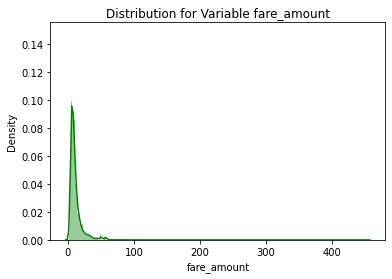

distance


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


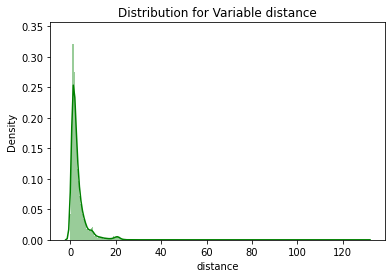

In [77]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train_data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [79]:
#Since the data is highly skewered, we need to apply log transform to the data
train_data['fare_amount'] = np.log1p(train_data['fare_amount'])
train_data['distance'] = np.log1p(train_data['distance'])

fare_amount


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


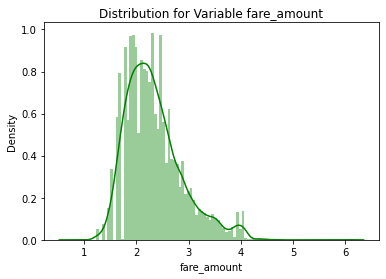

distance


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


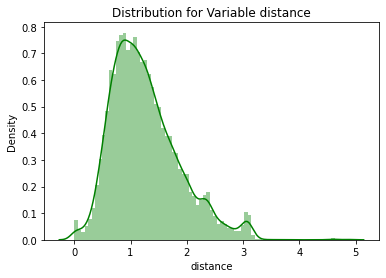

In [80]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train_data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


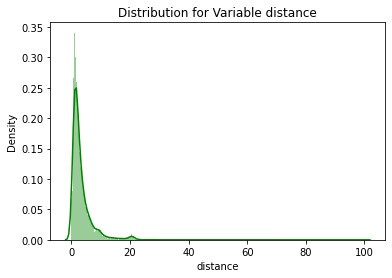

In [82]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test_data['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [83]:
#Doing the same for test_data 
test_data['distance'] = np.log1p(test_data['distance'])

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


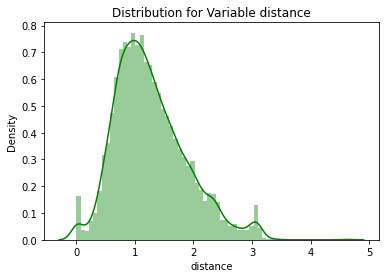

In [85]:
sns.distplot(test_data['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()